In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib

data_dir = pathlib.Path("./Alphabets")
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

56160


In [3]:
batch_size = 32
img_height = 40
img_width = 40

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 56160 files belonging to 26 classes.
Using 44928 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 56160 files belonging to 26 classes.
Using 11232 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [7]:
f = open("labels.txt", "a")
for cn in class_names:
    f.write(cn + "\n") 
f.close()


In [9]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 40, 40, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 40, 40, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 20, 20, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 64)       

In [13]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
1404/1404 [==============================] - 38s 27ms/step - loss: 0.0541 - accuracy: 0.9882 - val_loss: 0.2331 - val_accuracy: 0.9835
Epoch 2/50
1404/1404 [==============================] - 34s 24ms/step - loss: 0.0483 - accuracy: 0.9886 - val_loss: 0.2291 - val_accuracy: 0.9831
Epoch 3/50
1404/1404 [==============================] - 34s 24ms/step - loss: 0.0515 - accuracy: 0.9883 - val_loss: 0.2004 - val_accuracy: 0.9838
Epoch 4/50
1404/1404 [==============================] - 35s 25ms/step - loss: 0.0451 - accuracy: 0.9886 - val_loss: 0.1737 - val_accuracy: 0.9834
Epoch 5/50
1404/1404 [==============================] - 38s 27ms/step - loss: 0.0469 - accuracy: 0.9888 - val_loss: 0.2661 - val_accuracy: 0.9803
Epoch 6/50
1404/1404 [==============================] - 38s 27ms/step - loss: 0.0610 - accuracy: 0.9884 - val_loss: 0.1523 - val_accuracy: 0.9854
Epoch 7/50
1404/1404 [==============================] - 36s 26ms/step - loss: 0.0439 - accuracy: 0.9891 - val_loss: 0.2311 -

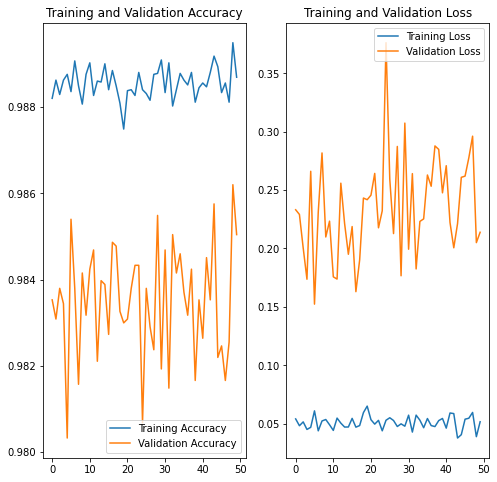

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
Alphabets_url = "./Alphabets/b/b15.png"

img = tf.keras.utils.load_img(
    Alphabets_url, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 20ms/step
This image most likely belongs to b with a 100.00 percent confidence.


In [18]:
model.save('Alphabets/alphabet')

INFO:tensorflow:Assets written to: Alphabets/alphabet\assets


INFO:tensorflow:Assets written to: Alphabets/alphabet\assets


In [19]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('alphabet.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpltcivzvs\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpltcivzvs\assets


In [20]:
model.evaluate(train_ds)

1404/1404 [==============================] - 15s 11ms/step - loss: 0.0424 - accuracy: 0.9892


[0.04235199838876724, 0.989160418510437]